In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from bs4 import BeautifulSoup

import tensorflow as tf
from tensorflow import keras

(I didn't know pandas could just read html tables until now)
Process the types in the table

,PBA_rank,Uni_name,Times_rank,USnews_rank,JT_rank,PBA_pts,Num_students,Cost
0,1,Harvard University,1,1,1,3,19257,36.173
1,2,Princeton University,3,2,7,12,7334,34.290
2,3,Massachusetts Institute of Technology,6,4,4,14,1022,36.390
3,3,Yale University,2,3,9,14,11454,35.300
4,5,California Institute of Technology,4,6,5,15,2133,34.437
...,...,...,...,...,...,...,...,...
95,95,University of South Carolina,84,108,73,265,27272,22.908
96,97,Colorado State University,79,125,62,266,27569,21.590
97,98,Worcester Polytechnic Institute,90,71,109,270,4157,36.390
98,99,Baylor University,90,76,109,275,14174,26.234


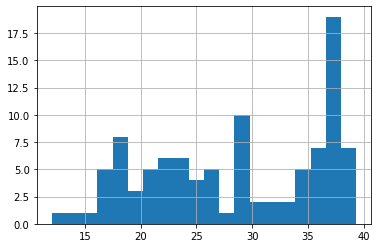

In [3]:
table = BeautifulSoup(open('unirev_best_unis.html','r').read()).find('table')
df_list = pd.read_html(str(table))
data = df_list[0]
data.columns
data.columns = ['PBA_rank', 'Uni_name',"Times_rank","USnews_rank","JT_rank","PBA_pts", "Num_students", 'Cost']
for col in data.columns[:-1]:
    try:
        data[col] = data[col].apply(lambda x: int(x))
    except:
        pass
    #print(f"col: {col} type: {type(data[col][0])}")
data['Cost'] = data['Cost'].apply(lambda x: int(x.replace(',','')[1:])/1000)
data['Cost'].hist(bins = 20)

data

<AxesSubplot:xlabel='JT_rank', ylabel='Cost'>

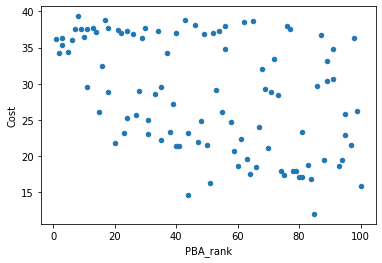

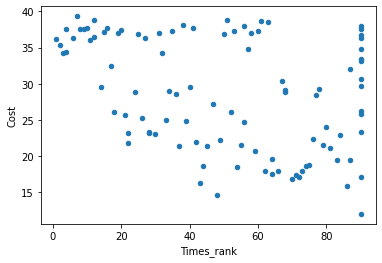

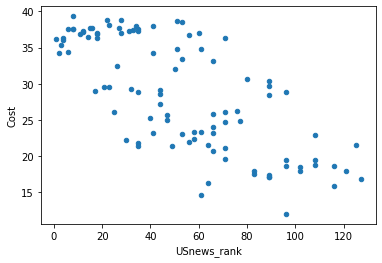

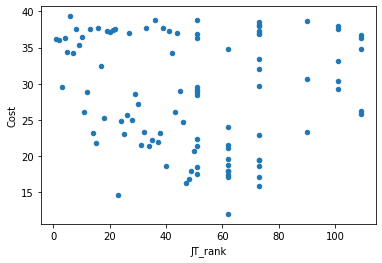

In [4]:
data.plot(x ='PBA_rank', y='Cost', kind= "scatter")
data.plot(x ='Times_rank', y='Cost',kind= "scatter")
data.plot(x ='USnews_rank', y='Cost',kind= "scatter")
data.plot(x ='JT_rank', y='Cost',kind= "scatter")


Seems like there's some correlation between US news and the price of the best universities

Split the training and test sets.

In [20]:
training_set = data.sample(frac = 0.8, random_state=25)
testing_set = data.drop(training_set.index)
uni_name_train = training_set.pop("Uni_name")
uni_name_test = testing_set.pop("Uni_name")
y_train = tf.constant(training_set.pop("Cost"), dtype = tf.float32)
y_test = tf.constant(testing_set.pop("Cost"), dtype = tf.float32)

x_train =  tf.constant(training_set.pop("USnews_rank"), dtype = tf.float32)
x_test = tf.constant(testing_set.pop("USnews_rank"), dtype = tf.float32)


Create Model

In [21]:
model = keras.models.Sequential([
    keras.layers.Input(shape = (1,)),
    keras.layers.Dense(5, activation = "relu"),
    keras.layers.Dense(70, activation = "softmax")
])


In [24]:
optimizer = keras.optimizers.Adam(lr=0.4)
model.compile(optimizer = optimizer,
              loss= "sparse_categorical_crossentropy",
              metrics = ["accuracy"])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [25]:
model.fit(x_train,y_train, epochs = 100, verbose=2)

Epoch 1/100
3/3 - 0s - loss: 2.9950 - accuracy: 0.0000e+00
Epoch 2/100
3/3 - 0s - loss: 2.8556 - accuracy: 0.0000e+00
Epoch 3/100
3/3 - 0s - loss: 2.8796 - accuracy: 0.0000e+00
Epoch 4/100
3/3 - 0s - loss: 2.8857 - accuracy: 0.0000e+00
Epoch 5/100
3/3 - 0s - loss: 2.8626 - accuracy: 0.0000e+00
Epoch 6/100
3/3 - 0s - loss: 2.8498 - accuracy: 0.0000e+00
Epoch 7/100
3/3 - 0s - loss: 2.8519 - accuracy: 0.0000e+00
Epoch 8/100
3/3 - 0s - loss: 2.8681 - accuracy: 0.0000e+00
Epoch 9/100
3/3 - 0s - loss: 2.8466 - accuracy: 0.0000e+00
Epoch 10/100
3/3 - 0s - loss: 2.8384 - accuracy: 0.0000e+00
Epoch 11/100
3/3 - 0s - loss: 2.8382 - accuracy: 0.0000e+00
Epoch 12/100
3/3 - 0s - loss: 2.8459 - accuracy: 0.0000e+00
Epoch 13/100
3/3 - 0s - loss: 2.8415 - accuracy: 0.0000e+00
Epoch 14/100
3/3 - 0s - loss: 2.8419 - accuracy: 0.0000e+00
Epoch 15/100
3/3 - 0s - loss: 2.8377 - accuracy: 0.0000e+00
Epoch 16/100
3/3 - 0s - loss: 2.8491 - accuracy: 0.0000e+00
Epoch 17/100
3/3 - 0s - loss: 2.8420 - accuracy: 

oups these ranking metrics really suck

In [26]:
model.evaluate(x_test,y_test, verbose = 1)

1/1 [==============================] - 0s 82ms/step - loss: 5.9559 - accuracy: 0.0000e+00


[5.955856800079346, 0.0]